In [1]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

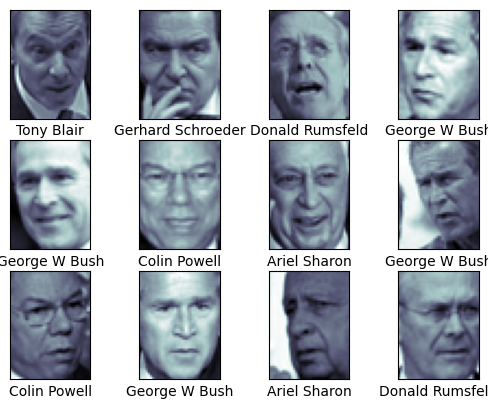

In [2]:
import matplotlib.pyplot as plt

# 加载数据
faces = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

# 可视化部分图像
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_names[labels[i]])
plt.show()

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 标准化数据
scaler = StandardScaler()
faces_scaled = scaler.fit_transform(faces.reshape(faces.shape[0], -1))

# PCA降维
pca = PCA(n_components=150, whiten=True)
faces_pca = pca.fit_transform(faces_scaled)


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(faces_pca, labels, test_size=0.3, random_state=42)

# 训练SVM分类器
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# 预测
y_pred = svm.predict(X_test)

# 评估
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.71      0.71        21
     Colin Powell       0.71      0.81      0.76        77
  Donald Rumsfeld       0.62      0.62      0.62        32
    George W Bush       0.84      0.80      0.82       162
Gerhard Schroeder       0.67      0.80      0.73        30
      Hugo Chavez       0.85      0.52      0.65        21
   Jacques Chirac       0.67      0.47      0.55        17
    Jean Chretien       0.84      0.94      0.89        17
    John Ashcroft       0.69      0.58      0.63        19
Junichiro Koizumi       0.82      0.69      0.75        13
  Serena Williams       0.62      0.62      0.62        13
       Tony Blair       0.68      0.78      0.73        46

         accuracy                           0.75       468
        macro avg       0.73      0.70      0.70       468
     weighted avg       0.75      0.75      0.75       468

[[ 15   2   1   0   1   0   0   1   0   0   1   0]
 [

In [6]:
# 查看准确率
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.7478632478632479

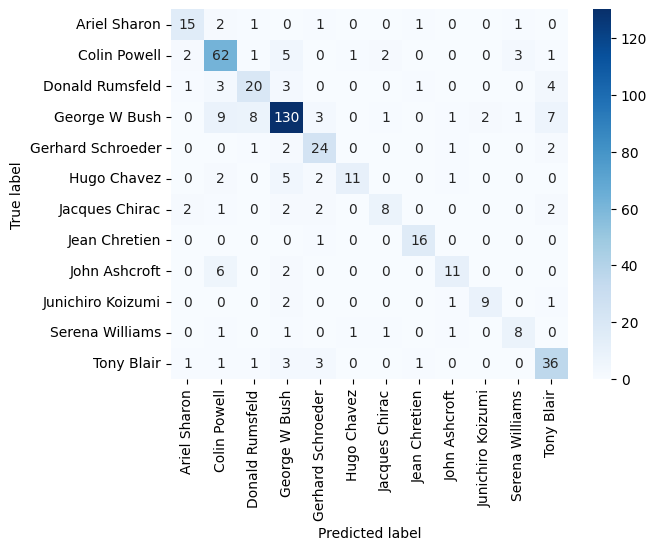

In [7]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()